In [17]:
import joblib

import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as model_selection

from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [18]:
NUM_COLS = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [19]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('lottery.csv')
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000,6992.000000
mean,10.437929,10.598970,10.603118,10.572368,10.629148,10.533324,10.540332,10.614703,10.536041,10.541047
std,3.300370,3.310679,3.330927,3.306958,3.297472,3.316048,3.297846,3.346786,3.332070,3.275816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,10.000000,10.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [20]:
# Loại bỏ các hàng có tất cả các cột từ zero đến nine đều bằng 0
df = df[df.iloc[:, 1:].all(axis=1)]
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000,6900.000000
mean,10.562029,10.740290,10.744493,10.713333,10.770870,10.673768,10.680870,10.756232,10.676522,10.681594
std,3.080936,3.096566,3.118302,3.093765,3.080849,3.105402,3.085374,3.134932,3.122609,3.061468
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,9.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [21]:
# Chuẩn bị dữ liệu
X = df.drop(columns=['Date']).values
y = df[NUM_COLS].values

In [22]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Chuẩn hóa dữ liệu bằng scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Reshape lại dữ liệu để phù hợp với input của mạng LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [25]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(10))
model.compile(loss='mse', optimizer='adam')

In [26]:
# Huấn luyện mô hình
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=2)

Epoch 1/100
345/345 - 2s - loss: 52.0960 - val_loss: 9.6432 - 2s/epoch - 5ms/step
Epoch 2/100
345/345 - 0s - loss: 9.6108 - val_loss: 9.5223 - 371ms/epoch - 1ms/step
Epoch 3/100
345/345 - 0s - loss: 9.5876 - val_loss: 9.5080 - 364ms/epoch - 1ms/step
Epoch 4/100
345/345 - 0s - loss: 9.5569 - val_loss: 9.4703 - 364ms/epoch - 1ms/step
Epoch 5/100
345/345 - 0s - loss: 9.4925 - val_loss: 9.3762 - 350ms/epoch - 1ms/step
Epoch 6/100
345/345 - 0s - loss: 9.3610 - val_loss: 9.1903 - 341ms/epoch - 987us/step
Epoch 7/100
345/345 - 0s - loss: 9.1528 - val_loss: 8.9564 - 341ms/epoch - 987us/step
Epoch 8/100
345/345 - 0s - loss: 8.8843 - val_loss: 8.6646 - 341ms/epoch - 988us/step
Epoch 9/100
345/345 - 0s - loss: 8.5263 - val_loss: 8.2319 - 337ms/epoch - 976us/step
Epoch 10/100
345/345 - 0s - loss: 7.9416 - val_loss: 7.4706 - 346ms/epoch - 1ms/step
Epoch 11/100
345/345 - 0s - loss: 6.9562 - val_loss: 6.2844 - 364ms/epoch - 1ms/step
Epoch 12/100
345/345 - 0s - loss: 5.6049 - val_loss: 4.7942 - 341ms/

In [27]:
# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 0.009465194307267666


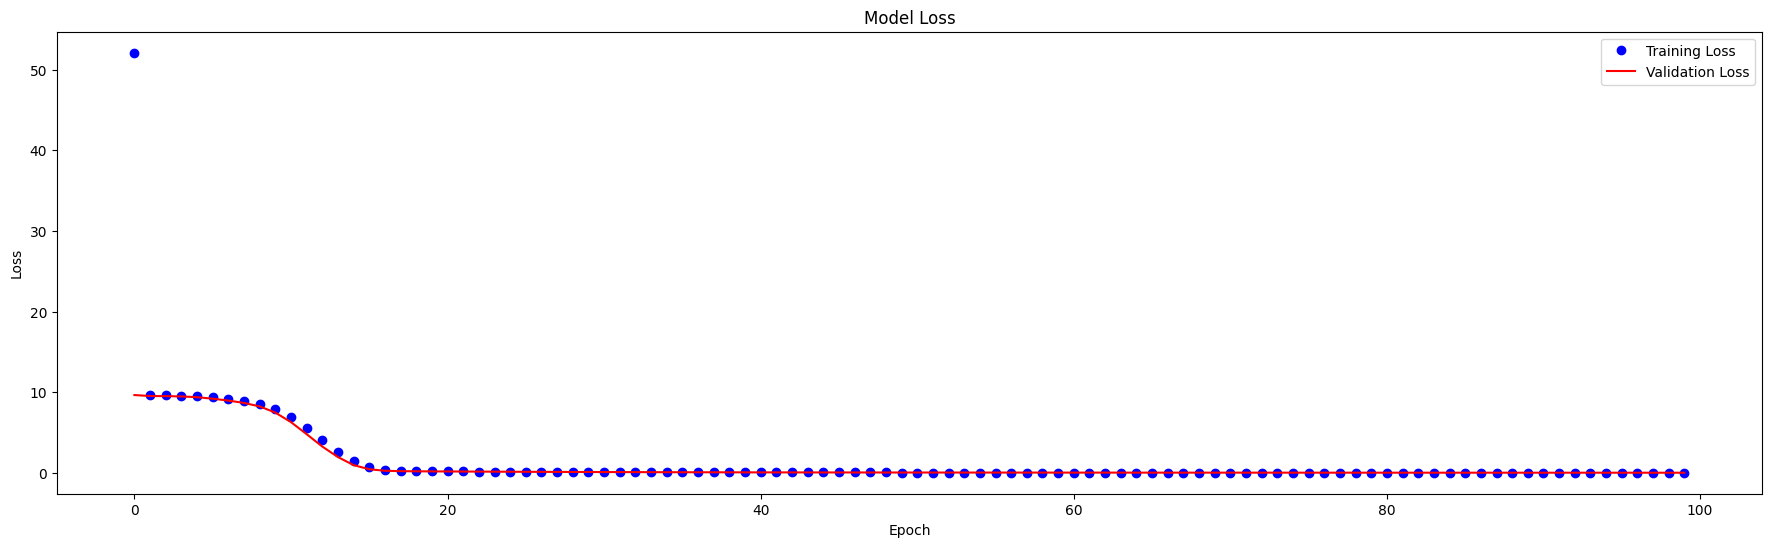

In [28]:
# Vẽ biểu đồ loss
plt.figure(figsize=(22, 6))
plt.plot(history.history['loss'],'bo', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [29]:
# Lưu mô hình và scaler
model.save('lottery.keras')
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [30]:
# Nhập ngày cần lấy dữ liệu
ngay = '2024-02-22'

In [31]:
# Tạo dictionary giữa các cột từ zero đến nine và dự đoán tương ứng
row_scaled = scaler.transform(df.loc[df['Date'] == ngay, 'Zero':'Nine'].values)
predictions_dict = {col_name: prediction for col_name, prediction in zip(NUM_COLS, model.predict(row_scaled.reshape((row_scaled.shape[0], 1, row_scaled.shape[1])))[0])}
predictions_dict

1/1 [==============================] - 0s 232ms/step


{'Zero': 11.99346,
 'One': 11.024884,
 'Two': 12.039265,
 'Three': 10.080277,
 'Four': 15.104469,
 'Five': 4.836005,
 'Six': 11.095469,
 'Seven': 10.986121,
 'Eight': 12.020064,
 'Nine': 7.9559927}

In [32]:
# Kết quả dự đoán cao nhất và thấp nhất
predictions_items = predictions_dict.items()
print(f'''Cặp số có giá trị dự đoán cao nhất: {dict(sorted(predictions_items, key=lambda x: x[1], reverse=True)[:2])}
Cặp số có giá trị dự đoán thấp nhất: {dict(sorted(predictions_items, key=lambda x: x[1])[:2])}''')

Cặp số có giá trị dự đoán cao nhất: {'Four': 15.104469, 'Two': 12.039265}
Cặp số có giá trị dự đoán thấp nhất: {'Five': 4.836005, 'Nine': 7.9559927}
